In [14]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [6]:
# Extract data

!unzip '/content/archive.zip'

Archive:  /content/test_set.zip
   creating: test_set/
   creating: test_set/forest/
  inflating: test_set/forest/0.98884800_1554454572_spin.jpg  
 extracting: test_set/forest/01_NeilBurnell_Mystical_photoverticall.jpg  
  inflating: test_set/forest/091318_LH_forest_loss_main_FREE.jpg  
 extracting: test_set/forest/1009821.jpg  
  inflating: test_set/forest/111188170_river_in_the_mountain_forest.jpg  
 extracting: test_set/forest/1170x500_Ireland_web.jpg  
  inflating: test_set/forest/1200px_Mountainarea.jpg  
  inflating: test_set/forest/146019.jpg  
  inflating: test_set/forest/1506697583544.jpg  
  inflating: test_set/forest/1551622076_img_5241.jpg  
  inflating: test_set/forest/1551903255_2942.jpg  
  inflating: test_set/forest/1556508284pexels_photo_1179229.jpeg  
 extracting: test_set/forest/16475617_web1_ForestHealth_VIB_190418_2.jpg  
  inflating: test_set/forest/18435324436_6a20e7fc70_k.jpg  
  inflating: test_set/forest/1_chimp.jpg  
  inflating: test_set/forest/200px_View_of

#Making Separate Dataset for Training and Testing

In [7]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')


Found 436 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [8]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

#Model Building

In [9]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

#Compiling the model

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Fitting the Model

In [11]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
14/14 [==============================] - 25s 1s/step - loss: 0.6156 - accuracy: 0.6491 - val_loss: 0.3111 - val_accuracy: 0.8898
Epoch 2/10
14/14 [==============================] - 15s 1s/step - loss: 0.3041 - accuracy: 0.8624 - val_loss: 0.0594 - val_accuracy: 0.9831
Epoch 3/10
14/14 [==============================] - 15s 1s/step - loss: 0.1817 - accuracy: 0.9335 - val_loss: 0.0518 - val_accuracy: 0.9831
Epoch 4/10
14/14 [==============================] - 15s 1s/step - loss: 0.1926 - accuracy: 0.9266 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 15s 1s/step - loss: 0.1725 - accuracy: 0.9358 - val_loss: 0.0507 - val_accuracy: 0.9915
Epoch 6/10
14/14 [==============================] - 15s 1s/step - loss: 0.1795 - accuracy: 0.9243 - val_loss: 0.0626 - val_accuracy: 0.9661
Epoch 7/10
14/14 [==============================] - 15s 1s/step - loss: 0.1651 - accuracy: 0.9083 - val_loss: 0.0485 - val_accuracy: 1.0000
Epoch 8/10
14/14 [==

#Predictions on Dataset

In [15]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 4s 804ms/step


In [16]:
predictions

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],

In [17]:
print(len(predictions))

118


#Plotting Loss per Iteration

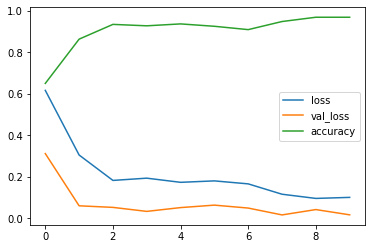

In [18]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

#Plotting accuracy per Iteration

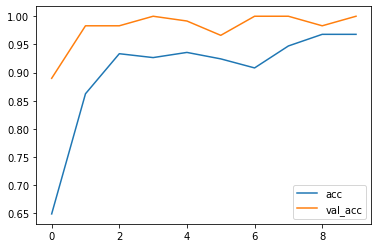

In [19]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()